In [2]:
from relajacion import *
from scipy import interpolate
import numpy as np
from matplotlib import pyplot as plt 



In [19]:
def evaluar_trazador_cubico(x_eval,x,a,b,c,d):
    y=np.zeros(len(x_eval))
    for i in range(0, len(x_eval)):
        flag=False
        for j in range(0, len(x)-1):
            if( (x[j]<=x_eval[i]) and ( x_eval[i]<=x[j+1])):
                y[i]=a[j]+b[j]*(x_eval[i]-x[j])+ c[j]*(x_eval[i]-x[j])**2+d[j]*(x_eval[i]-x[j])**3
                flag=True
                break
        if(not flag):
            raise ValueError(x_eval[i],"is out of range")
    return y
            
def trazador_cubico(x,y,tol=10**-10):
    x= np.array(x)
    y=np.array(y)
    if(len(x)!= len(y)):
        raise ValueError("x and y have diferente sizes")
    n = len(x)-1
    h= x[1:] - x[:-1]
    alpha=np.append(np.append(0,(3/h[1:])*(y[2:]-y[1:-1])-(3/h[:-1])*(y[1:-1]-y[:-2])),0)
    
    
    upper=np.append(0,h[1:])
    lower=np.append(h[:-1],0)
    center=np.append(np.append(1,2*(h[:-1]+h[1:] )),1)
    A=np.diag(center)+np.diag(upper,1)+np.diag(lower,-1)

    c= np.asarray(np.transpose(relajacion(A, np.transpose([alpha]), 10 ** -10)))[0]
    b= np.zeros(n+1)
    d=np.zeros(n+1)
    for i in reversed(range(0,n)):
        b[i]=(y[i+1]-y[i])/h[i]- h[i]*(c[i+1]+2*c[i])/3
        d[i]=(c[i+1]-c[i])/(3*h[i])
    f = lambda x_eval : evaluar_trazador_cubico(x_eval,x,y,b,c,d)
    return f

In [20]:
A = [[3, -1, 1], [-1, 3, -1], [1, -1, 3]]
b = [[-1], [7], [-7]]
x = relajacion(A, b, 10 ** -10)
print(A * x)

[[-2.71428571]
 [ 7.        ]
 [-6.71428571]]


In [21]:
A

[[3, -1, 1], [-1, 3, -1], [1, -1, 3]]

In [22]:
x = np.arange(-5,5,0.1)


ValueError: x and y must have same first dimension, but have shapes (100,) and (20,)

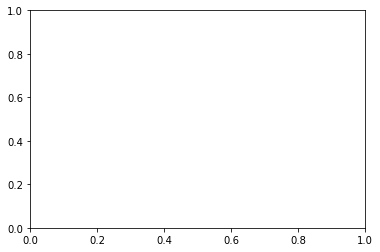

In [23]:
# plt.title("Matplotlib demo") 
# plt.xlabel("x axis caption") 
# plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()

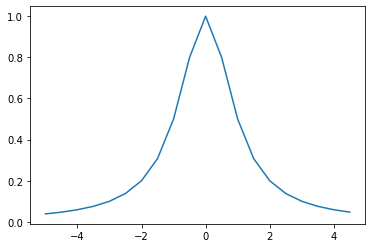

In [24]:
x = np.arange(-5,5,0.5)
y = 1/(1+x**2)
cs = interpolate.CubicSpline(x,y,bc_type="natural")
xi=np.arange(-5,5,0.11)
yi=cs(xi)

plt.plot(x,y) 
plt.show()

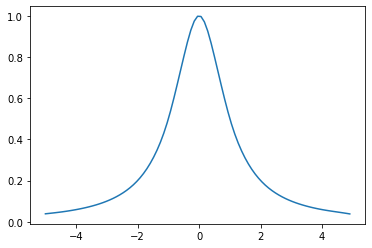

In [25]:
plt.plot(xi,yi) 
plt.show()

In [26]:
sc = trazador_cubico([0,1,2,3],[1,np.e,np.e**2,np.e**3])


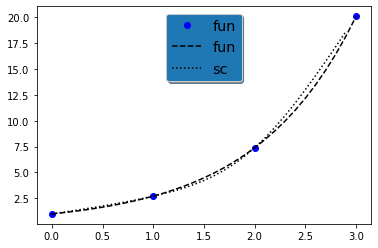

In [27]:
x_ref=[0,1,2,3]
y_ref=[1,np.e,np.e**2,np.e**3]
sc = trazador_cubico(x_ref,y_ref)

x_f=np.append(np.arange(0,3,0.1),3)
y_f=np.e**x_f

x_sc=np.arange(0,3,0.1)
y_sc=sc(x_sc)

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(x_ref, y_ref, 'bo', label='fun')
ax.plot(x_f, y_f, 'k--', label='fun')
ax.plot(x_sc, y_sc, 'k:', label='sc')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()



In [28]:
[1, 2, 3, 4][:-1]

[1, 2, 3]

In [29]:
x = np.arange(-5,5,1)
y = 1/(1+x**2)
cs = interpolate.CubicSpline(x,y,bc_type="natural")

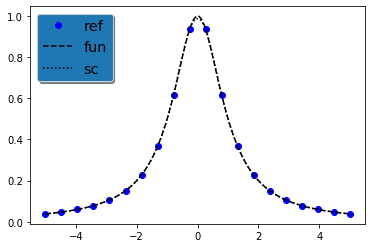

In [32]:
x_ref=np.linspace(-5, 5, num=20)
y_ref=1/(1+x_ref**2)

x_f=np.linspace(-5, 5, num=110)
y_f=1/(1+x_f**2)

sc = trazador_cubico(x_ref,y_ref)
x_sc=np.linspace(-5, 5, num=110)
y_sc=sc(x_sc)

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(x_ref, y_ref, 'bo', label='ref')
ax.plot(x_f, y_f, 'k--', label='fun')
ax.plot(x_sc, y_sc, 'k:', label='sc')

legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

In [34]:
x_ref = np.linspace(-5, 5, num=21)
y_ref = [0,0.0707,0,-0.0909,0,0.1273,0,-0.2122,0,0.6366,1,0.6366,0,-0.2122,0,0.1273,0,-0.0909,0,0.0707,0]

sc = trazador_cubico(x_ref,y_ref,tol=1)


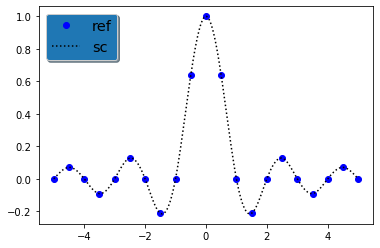

In [44]:
x_sc=np.linspace(-5, 5, num=200)
y_sc=sc(x_sc)


fig, ax = plt.subplots()
ax.plot(x_ref, y_ref, 'bo', label='ref')
# ax.plot(x_f, y_f, 'k--', label='fun')
ax.plot(x_sc, y_sc, 'k:', label='sc')

legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

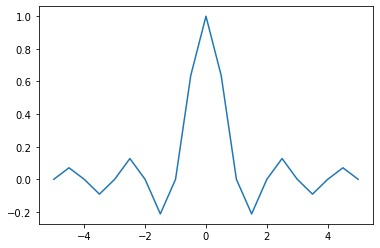

In [36]:
x_ref = np.linspace(-5, 5, num=21)
y_ref = [0,0.0707,0,-0.0909,0,0.1273,0,-0.2122,0,0.6366,1,0.6366,0,-0.2122,0,0.1273,0,-0.0909,0,0.0707,0]
plt.plot(x_ref,y_ref) 
plt.show()

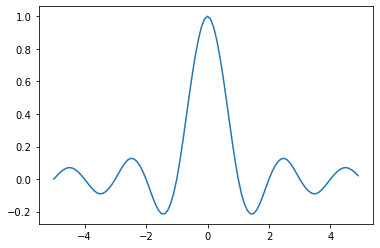

In [37]:
cs = interpolate.CubicSpline(x_ref,y_ref,bc_type="natural")
xi=np.arange(-5,5,0.1)
yi=cs(xi)
plt.plot(xi,yi) 
plt.show()

In [ ]:
x = np.arange(-5,5,1)
y = 1/(1+x**2)
cs = interpolate.CubicSpline(x,y,bc_type="natural")

plt.plot(x,y) 
plt.show()

In [ ]:
xi=np.arange(-5,5,0.1)
yi=cs(xi)
plt.plot(xi,yi) 
plt.show()

In [ ]:
def sor_solver(A, b, omega=0.5, initial_guess=[], convergence_criteria=1e-8):
    """
    This is an implementation of the pseudo-code provided in the Wikipedia article.
    Inputs:
    A: nxn numpy matrix
    b: n dimensional numpy vector
    omega: relaxation factor
    initial_guess: An initial solution guess for the solver to start with
    convergence_criteria: The maximum discrepancy acceptable to regard the current solution as fitting.
    Returns:
    phi: solution vector of dimension n
    """
    initial_guess=np.zeros(len(b))
    phi = initial_guess[:]
    residual = np.linalg.norm(np.matmul(A, phi) - b) #Initial residual
    while residual > convergence_criteria:
        for i in range(A.shape[0]):
            sigma = 0
            for j in range(A.shape[1]):
                if j != i:
                    sigma += A[i][j] * phi[j]
            phi[i] = (1 - omega) * phi[i] + (omega / A[i][i]) * (b[i] - sigma)
        residual = np.linalg.norm(np.matmul(A, phi) - b)
#         print('Residual: {0:10.6g}'.format(residual))
    return phi

In [ ]:
residual_convergence = 1e-8
omega = 0.5 #Relaxation factor
A = np.ones((4, 4))
A[0][0] = 4
A[0][1] = -1
A[0][2] = -6
A[0][3] = 0

A[1][0] = -5
A[1][1] = -4
A[1][2] = 10
A[1][3] = 8

A[2][0] = 0
A[2][1] = 9
A[2][2] = 4
A[2][3] = -2

A[3][0] = 1
A[3][1] = 0
A[3][2] = -7
A[3][3] = 5

b = np.ones(4)
b[0] = 2
b[1] = 21
b[2] = -12
b[3] = -6

In [ ]:
initial_guess = np.zeros(4)

phi = sor_solver(A, b)
phi

In [ ]:
from relajacion import *


In [ ]:
sp.eye(3)

In [ ]:
A = [[3, -1, 1], [-1, 3, -1], [1, -1, 3]]
b = [[-1], [7], [-7]]
%timeit x = relajacion(A, b, 10 ** -10)
print(A * x)

In [ ]:
n= 10
A=np.diag(np.ones(n),0)*6+np.diag(np.ones(n-1),-1)*2+np.diag(np.ones(n-1)*2,1)
b=np.ones(n)*15
b[0]=12
b[-1]=12

A

In [ ]:
relajacion(A, np.transpose([b]), 10 ** -10)

In [ ]:
from relajaciontavo import *
import numpy as np

In [ ]:
relajacion_tavo

In [ ]:
n= 5
A=np.diag(np.ones(n),0)*6+np.diag(np.ones(n-1),-1)*2+np.diag(np.ones(n-1)*2,1)
b=np.ones(n)*15
b[0]=12
b[-1]=12

A

In [ ]:
relajacion_tavo(A, np.transpose([b]), 10 ** -10)

In [ ]:
%timeit relajacion_tavo(A, np.transpose([b]), 10 ** -10)

In [ ]:
%timeit relajacion_tavo(A, np.transpose([b]), 10 ** -10)

In [ ]:
%timeit relajacion_tavo(A, np.transpose([b]), 10 ** -10)

In [ ]:
%timeit calcular_triangular_inferior(A)

In [ ]:
%timeit np.diag(np.diag(A,-1),-1)

In [ ]:
np.diag(A,-1)